**Data has already been processed and scaled in previous notebooks|Here that data gets imported and different machine learning models gets applied to the data**

Start by importing all the needed liberaries for machine learning

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
from xgboost import XGBClassifier

Defaulting to user installation because normal site-packages is not writeable


Next we load and view the modified dataset

In [81]:
df = pd.read_csv(r'..\data\BrightPath_Filtered_Scaled_Dataset.csv')
display(df.info())
display(df.describe().T)
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   float64
 1   Gender             2392 non-null   float64
 2   Ethnicity          2392 non-null   float64
 3   ParentalEducation  2392 non-null   float64
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   float64
 6   Tutoring           2392 non-null   float64
 7   ParentalSupport    2392 non-null   float64
 8   Extracurricular    2392 non-null   float64
 9   Sports             2392 non-null   float64
 10  Music              2392 non-null   float64
 11  Volunteering       2392 non-null   float64
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   float64
dtypes: float64(14)
memory usage: 261.8 KB


None

,count,mean,std,min,25%,50%,75%,max
Age,2392.0,8.673849e-16,1.000209,-1.307132,-1.307132,-0.417106,0.472919,1.362944
Gender,2392.0,-1.440691e-16,1.000209,-1.021981,-1.021981,0.978492,0.978492,0.978492
Ethnicity,2392.0,-7.129191e-17,1.000209,-0.853391,-0.853391,-0.853391,1.091641,2.064157
ParentalEducation,2392.0,-2.079347e-17,1.000209,-1.745885,-0.746087,0.253711,0.253711,2.253308
StudyTimeWeekly,2392.0,1.158494e-16,1.000209,-1.728882,-0.836740,-0.011789,0.820374,1.805881
Absences,2392.0,1.559511e-17,1.000209,-1.717694,-0.890822,0.054173,0.881045,1.707916
Tutoring,2392.0,-2.970496e-17,1.000209,-0.656870,-0.656870,-0.656870,1.522371,1.522371
ParentalSupport,2392.0,1.188199e-17,1.000209,-1.890357,-0.999551,-0.108744,0.782063,1.672869
Extracurricular,2392.0,4.232957e-17,1.000209,-0.788476,-0.788476,-0.788476,1.268269,1.268269
Sports,2392.0,-4.158695e-17,1.000209,-0.660132,-0.660132,-0.660132,1.514848,1.514848


,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,0.472919,0.978492,-0.853391,0.253711,1.780336,-0.890822,1.522371,-0.108744,-0.788476,-0.660132,2.019544,-0.431866,1.118086,2.0
1,1.362944,-1.021981,-0.853391,-0.746087,0.997376,-1.717694,-0.656870,-0.999551,-0.788476,-0.660132,-0.495161,-0.431866,1.242374,1.0
2,-1.307132,-1.021981,1.091641,1.253509,-0.984045,1.353542,-0.656870,-0.108744,-0.788476,-0.660132,-0.495161,-0.431866,-1.960277,4.0
3,0.472919,0.978492,-0.853391,1.253509,0.045445,-0.063951,-0.656870,0.782063,1.268269,-0.660132,-0.495161,-0.431866,0.161790,3.0
4,0.472919,0.978492,-0.853391,0.253711,-0.902311,0.290422,1.522371,0.782063,-0.788476,-0.660132,-0.495161,-0.431866,-0.675573,4.0


Now we can describe our features and our output variabe

In [82]:
output_var = "GradeClass"
features = df.columns.drop(output_var).tolist()
print(features)

['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA']


Now we can visualize our data to see if it is scaled correctly

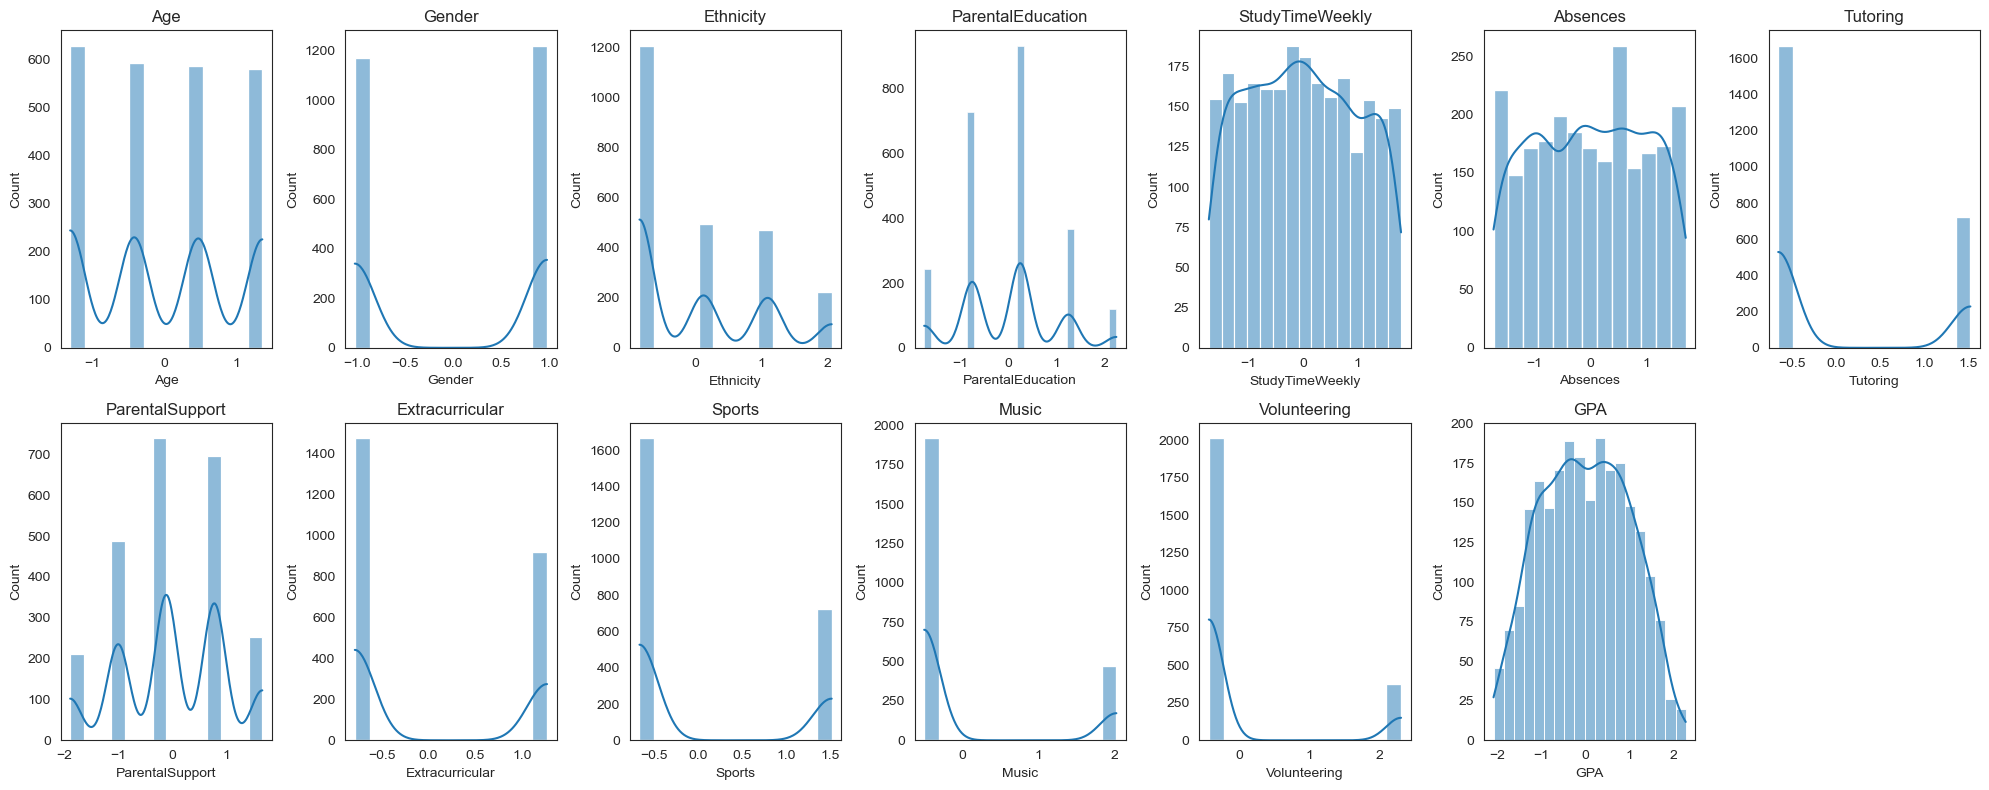

In [83]:
plt.figure(figsize=(20,8))
for i, col in enumerate(features):
    plt.subplot(2, 7, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

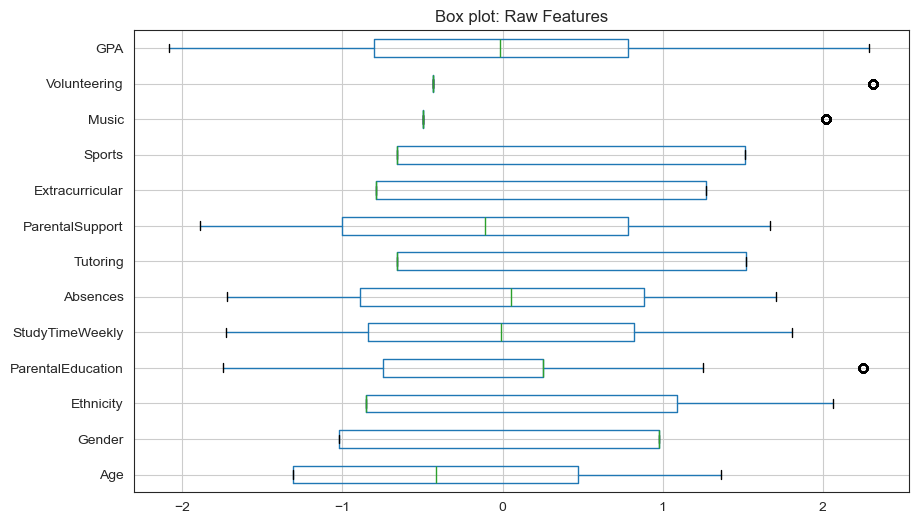

In [84]:
fig, ax = plt.subplots(figsize=(10,6))
boxplot = df[features].boxplot(vert=0, ax=ax)
_ = ax.set_title('Box plot: Raw Features')

We can identify that features such as Music and Volunteering skews our data, but that might be due to correlation issues. We can draw a correlation plot to confirm.

In [85]:
def CorrPlot(df, dropDuplicates = True, figsize =(8,6)): #We define CorrPlot as this entire function for drawing our graph
    df = np.abs(df.corr())
    #Exclude duplicate correlations by masking upper right values
    if dropDuplicates:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
    #Set background color/chart style
    sns.set_style(style='white')
    #Set up figure using matplotlib
    f, ax = plt.subplots(figsize=figsize)
    #Add diverging color map from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)
    #Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap,
                    annot = True,
                    square=True,
                    linewidth=.5, cbar_kws={"shrink": .75}, ax=ax)
        
    else:
               sns.heatmap(df, cmap=cmap,
                    annot = True,
                    square=True,
                    linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

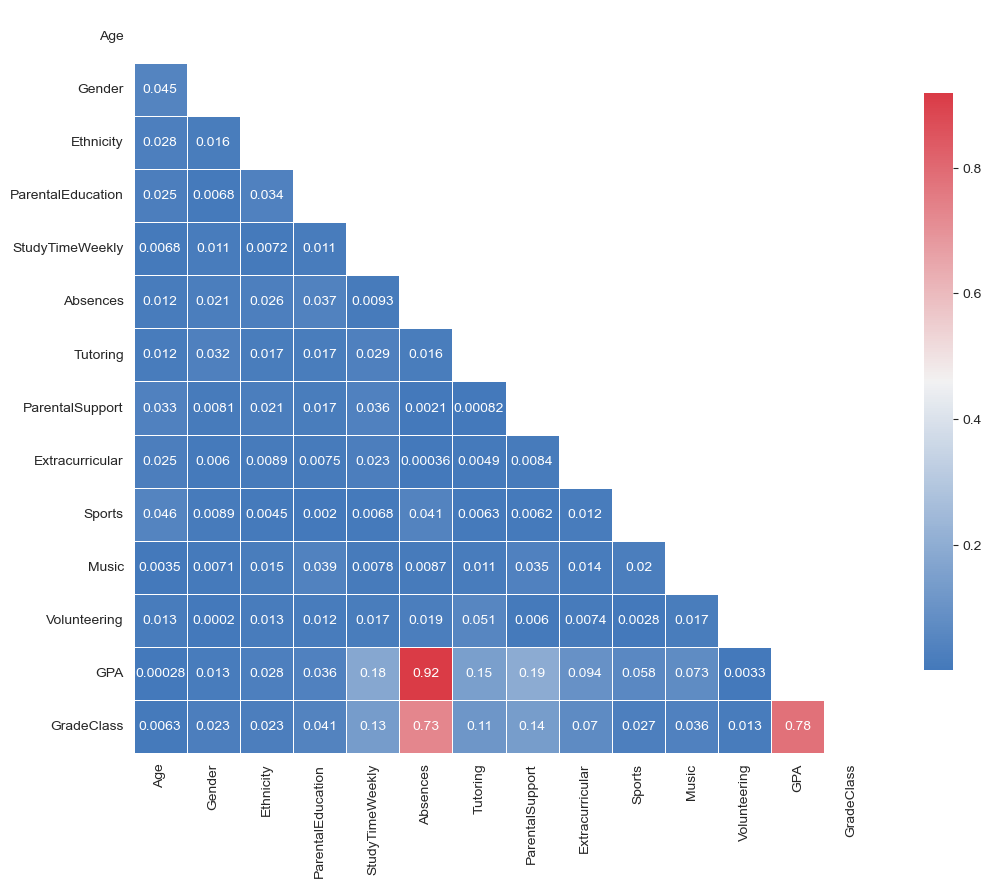

In [86]:
#Now we call the function defined above
CorrPlot(df, figsize=(12,10))

This correlation plot confirms that we can safely drop all features except for 5. Rather than dropping non correlative features, we will apply feature engineering

**FEATURE ENGINEERING**

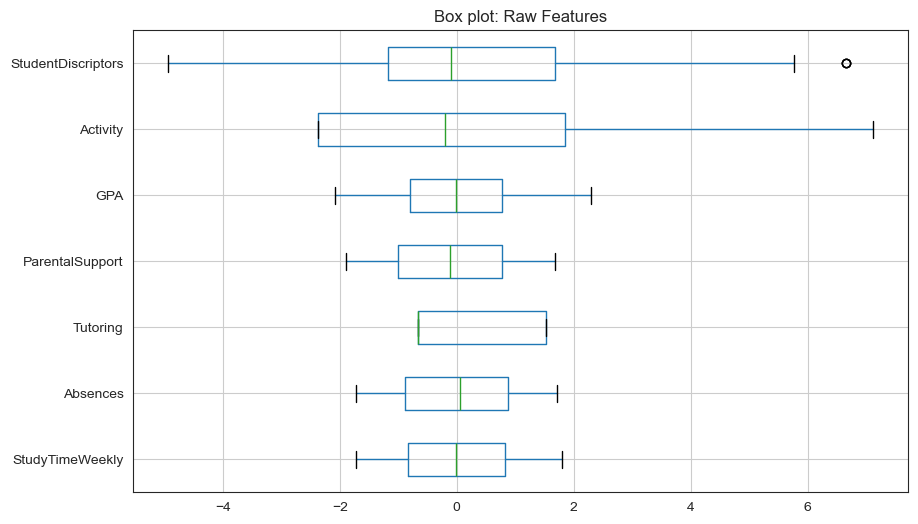

In [87]:
#We create a new dataframe to apply our feature engineering to
df_featured = df.copy()

#Create a new feature called 'Activity' to describe students engagement in outside school activities
df_featured['Activity'] = df[['Extracurricular', 'Music', 'Sports', 'Volunteering']].sum(axis=1)

#Create a new all incompasing term called StudentDiscriptors which takes into account all features describing a student in one feature
df_featured['StudentDiscriptors'] = df[['Age', 'Gender', 'Ethnicity', 'ParentalEducation']].sum(axis=1)

#Now we can safely drop the old columns from the dataframe
df_featured = df_featured.drop(columns=[
    'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
    'Extracurricular', 'Music', 'Volunteering',
    'Sports'
])

#We must now redefine our features
features = df_featured.columns.drop(output_var).to_list()

#Now we redraw our box-plot to ensure our engineered features are scaled properly
fig, ax = plt.subplots(figsize=(10,6))
boxplot = df_featured[features].boxplot(vert=0, ax=ax)
_ = ax.set_title('Box plot: Raw Features')

Now we can recheck our correlation plot with the new features, to see if any more features should be dropped

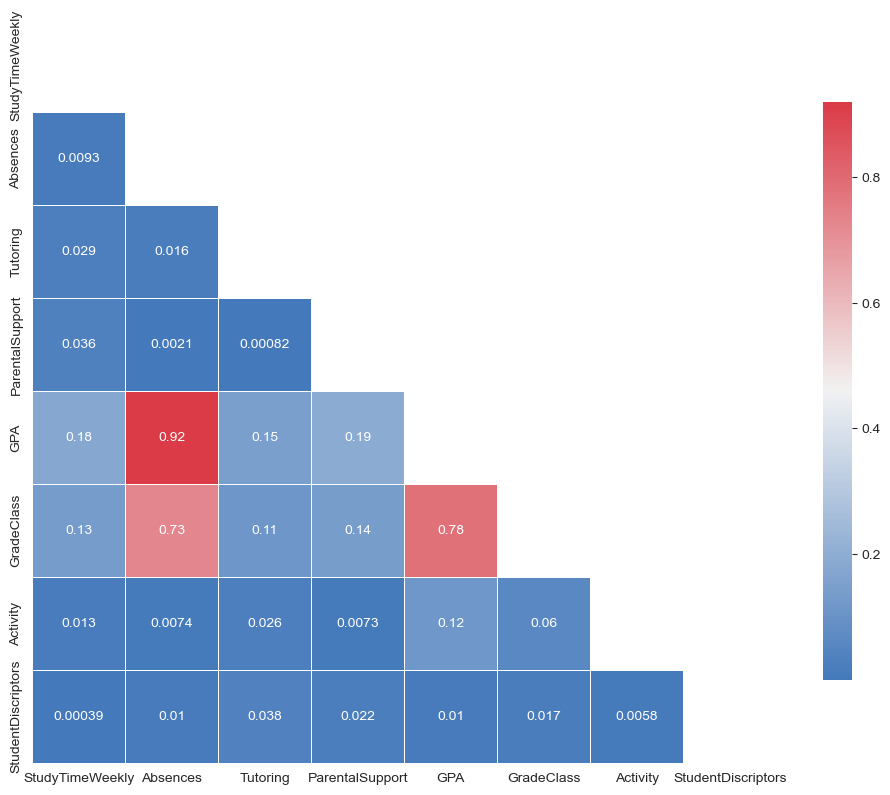

In [88]:
CorrPlot(df_featured, figsize=(12,10))

**Machine Learning**

We can see that all data is now more relevant, and we can apply our machine learning model

In [89]:
X = df_featured[["StudyTimeWeekly", "Absences","Tutoring","ParentalSupport","GPA","Activity","StudentDiscriptors"]]
Y = df_featured["GradeClass"]
display(X.head(), Y.head())

,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,GPA,Activity,StudentDiscriptors
0,1.780336,-0.890822,1.522371,-0.108744,1.118086,0.139070,0.851732
1,0.997376,-1.717694,-0.656870,-0.999551,1.242374,-2.375635,-1.258514
2,-0.984045,1.353542,-0.656870,-0.108744,-1.960277,-2.375635,0.016038
3,0.045445,-0.063951,-0.656870,0.782063,0.161790,-0.318890,1.851530
4,-0.902311,0.290422,1.522371,0.782063,-0.675573,-2.375635,0.851732


0    2.0
1    1.0
2    4.0
3    3.0
4    4.0
Name: GradeClass, dtype: float64

We can train our data

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
display(X_test.head())

,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,GPA,Activity,StudentDiscriptors
289,-0.371807,-1.127071,-0.656870,-0.999551,0.347567,-2.375635,-0.313280
1287,1.114525,-0.300200,1.522371,-0.108744,0.917710,2.546746,-3.038565
322,-0.975829,1.707916,1.522371,0.782063,-1.086130,1.856090,0.741959
820,-0.987617,0.290422,-0.656870,-0.999551,-0.462958,0.139070,-1.147865
252,0.619771,-1.363320,1.522371,-0.999551,1.101356,-0.318890,-0.258716


Now we can fit our machine learning models

**Logistic Regression**

In [91]:
model = LogisticRegression(random_state=0, solver='lbfgs')
model.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [92]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

Training Data:

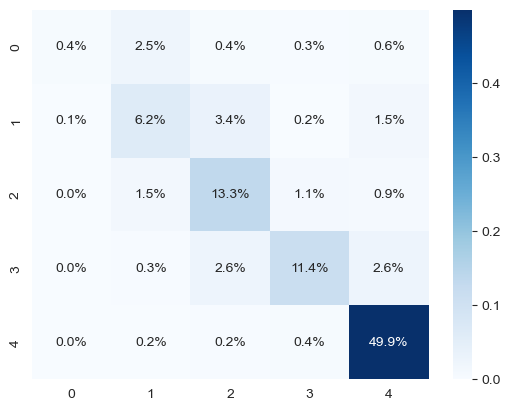

In [93]:
cm_train = confusion_matrix(Y_train, Y_train_pred)
_ = sns.heatmap(cm_train/np.sum(cm_train), annot=True, cmap='Blues', fmt='.1%')

In [94]:
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f'Train Accuracy: {np.round(100*train_accuracy, 1)}%')

Train Accuracy: 81.3%


Testing Data:

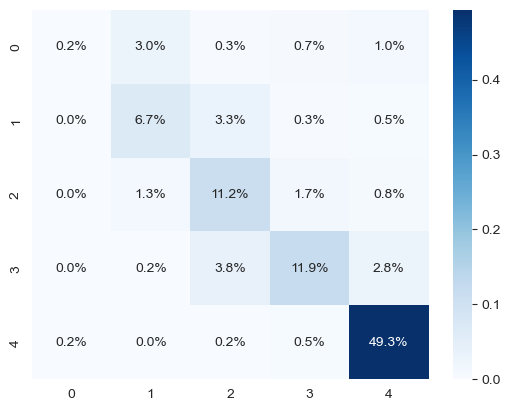

In [95]:
cm_test = confusion_matrix(Y_test, Y_test_pred)
_ = sns.heatmap(cm_test/np.sum(cm_test), annot=True, cmap='Blues', fmt='.1%')

In [96]:
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f'Test Accuracy: {np.round(100*test_accuracy, 1)}%')

Test Accuracy: 79.3%


In [97]:
print("LogisticRegression Report:\n", classification_report(Y_test, Y_test_pred))

LogisticRegression Report:
               precision    recall  f1-score   support

         0.0       0.50      0.03      0.06        31
         1.0       0.60      0.62      0.61        65
         2.0       0.59      0.74      0.66        90
         3.0       0.79      0.63      0.70       112
         4.0       0.90      0.98      0.94       300

    accuracy                           0.79       598
   macro avg       0.68      0.60      0.59       598
weighted avg       0.78      0.79      0.77       598



In [98]:
train_mae = np.round(mean_absolute_error(Y_train, Y_train_pred), 3)#The ,3 is just to 3 decimal places
train_mse = np.round(mean_squared_error(Y_train, Y_train_pred), 3)
train_rmse = np.round(np.sqrt(train_mse), 3)

print(f"Comparisons of Metrics - TRAINING DATA")
print(f"Training MAE - {train_mae}")
print(f"Training MSE - {train_mse}")
print(f"Training RMSE - {train_rmse}") 
print()

test_mae = np.round(mean_absolute_error(Y_test, Y_test_pred), 3)#The ,3 is just to 3 decimal places
test_mse = np.round(mean_squared_error(Y_test, Y_test_pred), 3)
test_rmse = np.round(np.sqrt(test_mse), 3)

print(f"Comparisons of Metrics - TESTING DATA")
print(f"Training MAE - {test_mae}")
print(f"Training MSE - {test_mse}")
print(f"Training RMSE - {test_rmse}") 

Comparisons of Metrics - TRAINING DATA
Training MAE - 0.264
Training MSE - 0.489
Training RMSE - 0.699

Comparisons of Metrics - TESTING DATA
Training MAE - 0.284
Training MSE - 0.532
Training RMSE - 0.729


In [99]:
import joblib
joblib.dump(model, r'..\Source\linieerregression.pkl')

['..\\Source\\linieerregression.pkl']

**Random Forest**

In [100]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [101]:
Y_test_pred = model.predict(X_test)
Y_train_pred = model.predict(X_train)

Training Data:

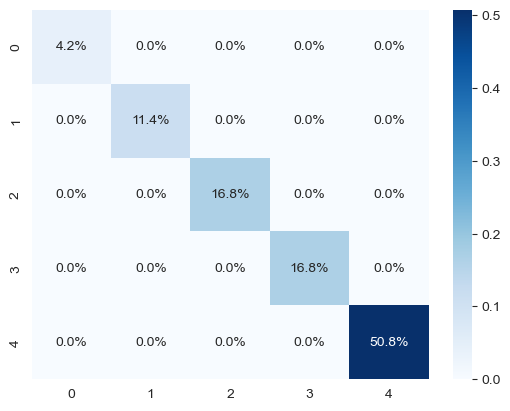

In [102]:
cm_train = confusion_matrix(Y_train, Y_train_pred)
_ = sns.heatmap(cm_train/np.sum(cm_train), annot=True, cmap='Blues', fmt='.1%')

In [103]:
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f'Train Accuracy: {np.round(100*train_accuracy, 1)}%')

Train Accuracy: 100.0%


Testing Data:

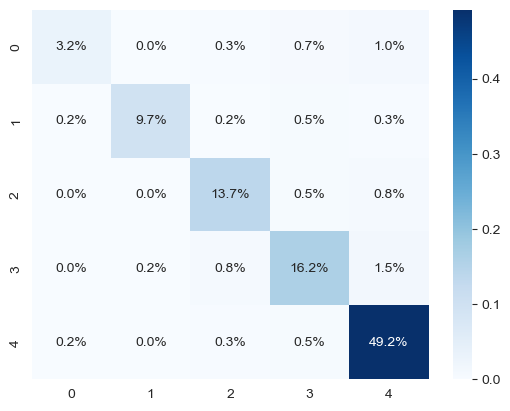

In [104]:
cm_test = confusion_matrix(Y_test, Y_test_pred)
_ = sns.heatmap(cm_test/np.sum(cm_test), annot=True, cmap='Blues', fmt='.1%')

In [105]:
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f'Test Accuracy: {np.round(100*test_accuracy, 1)}%')

Test Accuracy: 92.0%


In [106]:
print("Random Forest Report:\n", classification_report(Y_test, Y_test_pred))

Random Forest Report:
               precision    recall  f1-score   support

         0.0       0.90      0.61      0.73        31
         1.0       0.98      0.89      0.94        65
         2.0       0.89      0.91      0.90        90
         3.0       0.88      0.87      0.87       112
         4.0       0.93      0.98      0.95       300

    accuracy                           0.92       598
   macro avg       0.92      0.85      0.88       598
weighted avg       0.92      0.92      0.92       598



In [107]:
train_mae = np.round(mean_absolute_error(Y_train, Y_train_pred), 3)#The ,3 is just to 3 decimal places
train_mse = np.round(mean_squared_error(Y_train, Y_train_pred), 3)
train_rmse = np.round(np.sqrt(train_mse), 3)

print(f"Comparisons of Metrics - TRAINING DATA")
print(f"Training MAE - {train_mae}")
print(f"Training MSE - {train_mse}")
print(f"Training RMSE - {train_rmse}") 
print()
test_mae = np.round(mean_absolute_error(Y_test, Y_test_pred), 3)#The ,3 is just to 3 decimal places
test_mse = np.round(mean_squared_error(Y_test, Y_test_pred), 3)
test_rmse = np.round(np.sqrt(test_mse), 3)

print(f"Comparisons of Metrics - TESTING DATA")
print(f"Training MAE - {test_mae}")
print(f"Training MSE - {test_mse}")
print(f"Training RMSE - {test_rmse}") 

Comparisons of Metrics - TRAINING DATA
Training MAE - 0.0
Training MSE - 0.0
Training RMSE - 0.0

Comparisons of Metrics - TESTING DATA
Training MAE - 0.157
Training MSE - 0.401
Training RMSE - 0.633


In [108]:
import joblib
joblib.dump(model, r'..\Source\randomforest.pkl')
joblib.dump(scaler_7, r'..\Source\scaler7.pkl')

['..\\Source\\scaler7.pkl']

**XGBOOST**

In [109]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, Y_train)

C:\Users\tarin\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [09:49:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [110]:
Y_test_pred = model.predict(X_test)
Y_train_pred = model.predict(X_train)

Training Data:

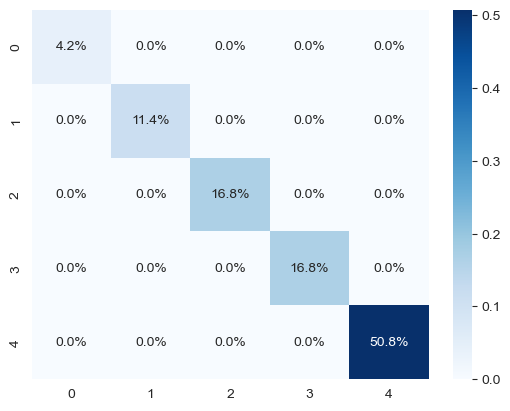

In [111]:
cm_train = confusion_matrix(Y_train, Y_train_pred)
_ = sns.heatmap(cm_train/np.sum(cm_train), annot=True, cmap='Blues', fmt='.1%')

In [112]:
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f'Train Accuracy: {np.round(100*train_accuracy, 1)}%')

Train Accuracy: 100.0%


Testing Data:

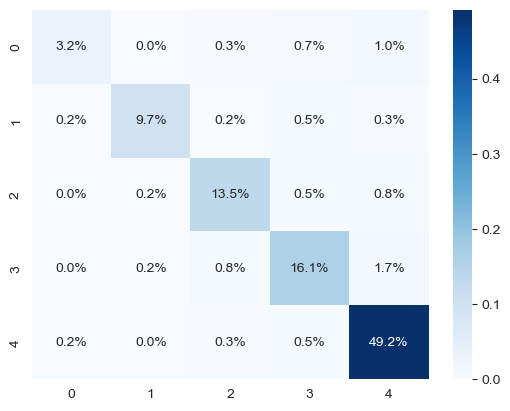

In [113]:
cm_test = confusion_matrix(Y_test, Y_test_pred)
_ = sns.heatmap(cm_test/np.sum(cm_test), annot=True, cmap='Blues', fmt='.1%')

In [114]:
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f'Test Accuracy: {np.round(100*test_accuracy, 1)}%')

Test Accuracy: 91.6%


In [115]:
print("XGBOOST Report:\n", classification_report(Y_test, Y_test_pred))

XGBOOST Report:
               precision    recall  f1-score   support

         0.0       0.90      0.61      0.73        31
         1.0       0.97      0.89      0.93        65
         2.0       0.89      0.90      0.90        90
         3.0       0.88      0.86      0.87       112
         4.0       0.93      0.98      0.95       300

    accuracy                           0.92       598
   macro avg       0.91      0.85      0.88       598
weighted avg       0.92      0.92      0.91       598



In [116]:
train_mae = np.round(mean_absolute_error(Y_train, Y_train_pred), 3)#The ,3 is just to 3 decimal places
train_mse = np.round(mean_squared_error(Y_train, Y_train_pred), 3)
train_rmse = np.round(np.sqrt(train_mse), 3)

print(f"Comparisons of Metrics - TRAINING DATA")
print(f"Training MAE - {train_mae}")
print(f"Training MSE - {train_mse}")
print(f"Training RMSE - {train_rmse}") 
print()

test_mae = np.round(mean_absolute_error(Y_test, Y_test_pred), 3)#The ,3 is just to 3 decimal places
test_mse = np.round(mean_squared_error(Y_test, Y_test_pred), 3)
test_rmse = np.round(np.sqrt(test_mse), 3)

print(f"Comparisons of Metrics - TESTING DATA")
print(f"Training MAE - {test_mae}")
print(f"Training MSE - {test_mse}")
print(f"Training RMSE - {test_rmse}") 

Comparisons of Metrics - TRAINING DATA
Training MAE - 0.0
Training MSE - 0.0
Training RMSE - 0.0

Comparisons of Metrics - TESTING DATA
Training MAE - 0.161
Training MSE - 0.405
Training RMSE - 0.636


In [117]:
import joblib
joblib.dump(model, r'..\Source\xgboost.pkl')

['..\\Source\\xgboost.pkl']